# Homework Assignment 4

## Using the Perceptron, SVMs, and PCA with Credit Card Approval Data

### <p style="text-align: right;"> &#9989; Lee Chungmin.</p>
### <p style="text-align: right;"> &#9989; chungminlee08.</p>

<img src="https://storage.googleapis.com/kaggle-datasets-images/3807174/6598147/ab3c96d720559e8bff08d02bd035f93c/dataset-cover.jpg?t=2023-10-03-01-37-20" width=400px align="right" style="margin-left: 20px" alt="Underwater naval mines">

### Goals for this homework assignment

By the end of this assignment, you should be able to:
* Use `git` and the branching functionality to track your work and turn in your assignment
* Read in data and prepare it for modeling
* Build, fit, and evaluate an SVC model of data
* Use PCA to reduce the number of important features
* Build, fit, and evaluate an SVC model of PCA-transformed data
* Train a perceptron and compare to SVC model

### Assignment instructions:

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **62 points** possible on this assignment. Point values for each part are included in the section headers.

This assignment is **due by 11:59 pm on Friday, April 12. It should be pushed to your repo (see Part 1) AND submitted to D2L**. 

#### Imports

It's useful to put all of the imports you need for this assignment in one place. Read through the assignment to figure out which imports you'll need or add them here as you go.

In [1]:
# Put all necessary imports here

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

---
## Part 1: Git Repo Management and Branching (6 points)

For this assignment, you're going to add it to the `cmse202-s24-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s24-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository.

3. Create a **new branch** called `hw04_branch`.

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

```bash
git clone -b hw04_branch https://github.com/Chungminlee08/cmse202-s24-turnin
```

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s24-turnin`" repository inside the `hw-04` directory that you just created within the new branch `hw04_branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.


---
<a id="loading"></a>
## Part 2. Loading a the dataset: Credit card approval data (7 points)

The dataset contains information about individuals and whether they were approved or rejected for a credit card application. You can think of this approval or rejection as **binary classification**.

The goal of this assignment is to use this dataset to practice using the Perceptron classifier, SVMs, and PCA tools we've covered in class. Since the goal of the assignment is to develop models, we have done most of the pre-processing of the data for you (isolating numeric columns, rescaling the data with `StandardScalar`), with the exception of leaving it to you to remove some missing values as we have done in class. 
 
#### The data

**&#9989; Do This:**  To get started, you'll need to download the associated `cc_data.csv` file:
`https://raw.githubusercontent.com/yangy5/HWFiles/main/cc_data.csv`

Once you've downloaded the data, **open the files using a text browser or other tool on your computer and take a look at the data to get a sense of the information it contains.** If you are curious about this dataset it came from the following link [CC Approval Data](https://www.kaggle.com/datasets/youssefaboelwafa/credit-card-approval/data).

### 2.1 Load the data

**&#9989; Task 2.1 (2 point):** Read the ```cc_data.csv``` file into your notebook and drop the missing values. The missing values contain "?". We're going to use "class" column as the classes that we'll be trying to predict with our classification models.

Once you've loaded in the data and dropped the missing data, **display the DataFrame to make sure it looks reasonable**. You should have **7 columns** and **666 rows**.

In [2]:
!curl -O https://raw.githubusercontent.com/yangy5/HWFiles/main/cc_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 86051  100 86051    0     0   829k      0 --:--:-- --:--:-- --:--:--  832k


In [3]:
# Put your code here

# Load the data
df = pd.read_csv('cc_data.csv')

# Display the shape of the original DataFrame
print("Original shape:", df.shape)

# Drop rows with missing values denoted as "?"
df = df.replace('?', pd.NA).dropna()

# Display the shape of the DataFrame after dropping missing values and display the dataframe.
print("Shape after dropping missing values:", df.shape)
print(df)

Original shape: (690, 7)
Shape after dropping missing values: (666, 7)
                     var1      var2      var3      var4                  var5  \
0    -0.06173102354640747 -0.955920 -0.290872 -0.287892    0.1034783002693444   
1       2.266444267315627 -0.060007  0.244013  0.740293   -0.8113307237034743   
2     -0.5910898450678396 -0.855481 -0.216167 -0.493529    0.5522525384446895   
3      -0.312611981613437 -0.646569  0.456175  0.534656  -0.48338031888302985   
4     -0.9531946945445854  0.174015 -0.153415 -0.493529   -0.3683100014021721   
..                    ...       ...       ...       ...                   ...   
685   -0.8770941372642533  1.069928 -0.290872 -0.493529   0.43718222096383175   
686   -0.7441272294887274 -0.805262 -0.066758 -0.082255   0.09197126852125864   
687   -0.5283696055510823  1.755924 -0.066758 -0.287892   0.09197126852125864   
688   -1.1413554130948576 -0.914740 -0.652442 -0.493529    0.5522525384446895   
689   0.28699350816676367 -0.277959  1

### 2.2 Relabeling the classes

To simplify the process of modeling the credit card approval data, we should convert the class labels from strings to integers. For example, rather than `+`, we can consider this to be class "`1`".

**&#9989; Task 2.2 (2 points):** Replace all of the strings in your "Class" column with integers based on the following:

| original label | replaced label |
| -------- | -------- |
| + | 1 |
| - | 0 |

Once you've replaced the labels, display your DataFrame and confirm that it looks correct.

In [4]:
# Put your code here

# Replace string labels with integers
df['class'] = df['class'].replace({'+': 1, '-': 0})

# Display the DataFrame to confirm the replacement
print(df)

                     var1      var2      var3      var4                  var5  \
0    -0.06173102354640747 -0.955920 -0.290872 -0.287892    0.1034783002693444   
1       2.266444267315627 -0.060007  0.244013  0.740293   -0.8113307237034743   
2     -0.5910898450678396 -0.855481 -0.216167 -0.493529    0.5522525384446895   
3      -0.312611981613437 -0.646569  0.456175  0.534656  -0.48338031888302985   
4     -0.9531946945445854  0.174015 -0.153415 -0.493529   -0.3683100014021721   
..                    ...       ...       ...       ...                   ...   
685   -0.8770941372642533  1.069928 -0.290872 -0.493529   0.43718222096383175   
686   -0.7441272294887274 -0.805262 -0.066758 -0.082255   0.09197126852125864   
687   -0.5283696055510823  1.755924 -0.066758 -0.287892   0.09197126852125864   
688   -1.1413554130948576 -0.914740 -0.652442 -0.493529    0.5522525384446895   
689   0.28699350816676367 -0.277959  1.812810 -0.493529   -1.0587319062873184   

         var6  class  
0   

### 2.3 Separating the "features" from the "labels"

As we've seen when working with `sklearn` it can be much easier to work with the data if we have separate variables that store the features and the labels.

**&#9989; Task 2.3 (1 point):** Split your DataFrame so that you have two separate DataFrames, one called `features`, which contains all of the credit card approval features, and one called `labels`, which contains all of the *new* approval integer labels you just created. **Display both of these new DataFrames to make sure they look correct.**

In [5]:
# Put your code here

# Separate features and labels
features = df.drop(columns=['class'])
labels = df['class']

# Display the features DataFrame
print("features:")
print(features.head())

# Display the labels DataFrame
print("\nlabels:")
print(labels.head())

features:
                   var1      var2      var3      var4                  var5  \
0  -0.06173102354640747 -0.955920 -0.290872 -0.287892    0.1034783002693444   
1     2.266444267315627 -0.060007  0.244013  0.740293   -0.8113307237034743   
2   -0.5910898450678396 -0.855481 -0.216167 -0.493529    0.5522525384446895   
3    -0.312611981613437 -0.646569  0.456175  0.534656  -0.48338031888302985   
4   -0.9531946945445854  0.174015 -0.153415 -0.493529   -0.3683100014021721   

       var6  
0 -0.195272  
1 -0.087788  
2 -0.037117  
3 -0.194696  
4 -0.195272  

labels:
0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64


&#9989; **Question 2.1 (1 point):** How balanced are the classes? Does it matter for the set of classes to be balanced? Why or why not? (Include the code you used to determine this along with your written answer below.)

<font size=+3>&#9998;</font> Based on the counts, we can see how balanced or imbalanced the classes are. For instance, if one class has significantly more instances than the other, it's considered imbalanced. Based on the counts obtained, there are 367 instances labeled as class 0 and 299 instances labeled as class 1. While the classes are not perfectly balanced, they are relatively close in count.

Regarding whether class balance matters, it depends on the specific problem and the machine learning algorithm being used. In many cases, class imbalance can lead to biased models, where the classifier might favor the majority class and perform poorly on the minority class. However, some algorithms are robust to class imbalance, while others might require techniques such as class weighting, resampling, or using different evaluation metrics to handle imbalanced classes effectively.

Therefore, while class balance is important to consider, it's not always critical, and the impact can vary depending on the context and the algorithm being used.

In [6]:
# Count occurrences of each class label
class_counts = labels.value_counts()

# Display the class counts
print(class_counts)

class
0    367
1    299
Name: count, dtype: int64


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 2", and push the changes to GitHub.

---

---
## Part 3. Building an SVC model (5 points)

Now, to tackle this classification problem, we will use a support vector machine. Of course, we could easily replace this with any `sklearn` classifier we choose, but for now we will just use an SVC with a linear kernel.

### 3.1 Splitting the data

But first, we need to split our data into training and testing data!

**&#9989; Task 3.1 (2 point):** Split your data into a training and testing set with a training set representing 80% of your data. For reproducibility , set the `random_state` argument to `1`. Print the lengths to show you have the right number of entries.

In [7]:
# Put your code here

from sklearn.model_selection import train_test_split

# Splitting the data into features and labels
x = features
y = labels

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Print lengths of training and testing sets
print("Length of training set:", len(x_train))
print("Length of testing set:", len(x_test))

Length of training set: 532
Length of testing set: 134


### 3.2 Modeling the data and evaluating the fit

As you have done this a number of times at this point, we ask you to do most of the analysis for this problem in one cell.

**&#9989; Task 3.2 (2 points):** Build a **sigmoid** kernel SVC model with `C=10.0`, fit it to the training set, and use the test features to predict the outcomes. Evaluate the fit using the **confusion matrix** and **classification report**.

**First Note:** Double-check the documentation on the confusion matrix because the way `sklearn` outputs false positives and false negatives may be different from what most images on the web indicate.

In [8]:
# Put your code here

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Build the sigmoid kernel SVC model
svc_model = SVC(kernel='sigmoid', C=10.0, random_state=1)

# Fit the model to the training set
svc_model.fit(x_train, y_train)

# Predict outcomes using the test features
y_pred = svc_model.predict(x_test)

# Evaluate the fit using the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Evaluate the fit using the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[51 25]
 [16 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        76
           1       0.63      0.72      0.67        58

    accuracy                           0.69       134
   macro avg       0.69      0.70      0.69       134
weighted avg       0.70      0.69      0.70       134



&#9989; **Question 3.1 (1 point):** How accurate is your model? What evidence are you using to determine that? How many false positives and false negatives does it predict for each class?

<font size=+3>&#9998;</font>

Based on the provided confusion matrix and classification report:

* Model Accuracy: The accuracy of the model can be determined from the classification report, where the accuracy is calculated as the ratio of correctly predicted instances to the total number of instances. In this case, the accuracy is calculated as (51 + 42) / 134 ≈ 0.694, which is approximately 69.4%.

* False Positives and False Negatives:
    * For Class 0 (Negative Class):
        * False Positives: 25
        * False Negatives: 16
    * For Class 1 (Positive Class):
        * False Positives: 16
        * False Negatives: 25

These values are obtained directly from the confusion matrix. False positives represent the instances that were incorrectly classified as positive (Class 1) when they were actually negative (Class 0), while false negatives represent the instances that were incorrectly classified as negative (Class 0) when they were actually positive (Class 1).

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 3", and push the changes to GitHub.

---

---
## Part 4. Finding and using the best hyperparameters (8 points)

At this point, we have fit one model and determined it's performance, but is it the best model? We can use `GridSearchCV` to find the best model (given our choices of parameters). Once we do that, we will use that "best" model for making predictions. 


### 4.1 Performing a grid search

**&#9989; Task 4.1 (4 points):** Using the following parameters `C` = `0.1`, `1.0`, `10.0`, `100.0`, `1000.0` and `gamma` = `0.01`, `0.1`, `1.0`, `10.0` for a `linear`, `rbf`, and `sigmoid` kernels use `GridSearchCV` with the `SVC()` model to find the best fit parameters. Once, you're run the grid search, print the "best params" that the grid search found (*hint*: there's an attribute associated with the GridSearchCV object that stores this information). Note that this code could take a while to run since it is repeatedly training your SVM. 

In [9]:
# Put your code here

from sklearn.model_selection import GridSearchCV

# Define the parameters grid
param_grid = {'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
              'gamma': [0.01, 0.1, 1.0, 10.0],
              'kernel': ['linear', 'rbf', 'sigmoid']}

# Instantiate the SVC model
svc = SVC(random_state=1)

# Instantiate GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Perform grid search
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}


&#9989; **Question 4.1 (1 point):** How do the "best params" results of the grid search compare to what you used in Part 3? Did the hyper parameter(s) change? What kernel did the grid search determine was the best option? 

<font size=+3>&#9998;</font> The "best params" results obtained from the grid search are different from what was used in Part 3. In Part 3, a sigmoid kernel with C=10.0 was used.

After performing the grid search, the hyperparameters that yielded the best results are C=100.0, gamma=0.1, and the rbf kernel. This means that the best performing model according to the grid search uses a different combination of hyperparameters and a different kernel compared to the initial model.

Therefore, the hyperparameters did change based on the results of the grid search, and the grid search determined that the rbf kernel was the best option for this dataset.

### 4.2 Evaluating the best fit model

Now that we have found the "best params", let's determine how good the fit is.

**&#9989; Task 4.2 (2 points):** Use the test features to predict the outcomes for the best model. Evaluate the fit using the **confusion matrix** and **classification report**.

**Note:** Double-check the documentation on the confusion matrix because the way `sklearn` outputs false positives and false negatives may be different from what most images on the web indicate.

In [10]:
# Put your code here

# Predict outcomes using the test features for the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)

# Evaluate the fit using the confusion matrix for the best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix for the best model:")
print(conf_matrix_best)

# Evaluate the fit using the classification report for the best model
class_report_best = classification_report(y_test, y_pred_best)
print("\nClassification Report for the best model:")
print(class_report_best)

Confusion Matrix for the best model:
[[66 10]
 [21 37]]

Classification Report for the best model:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        76
           1       0.79      0.64      0.70        58

    accuracy                           0.77       134
   macro avg       0.77      0.75      0.76       134
weighted avg       0.77      0.77      0.76       134



&#9989; **Question 4.2 (1 point):** How accurate is this "best" model? What evidence are you using to determine that? How many false positives and false negatives does it predict?

<font size=+3>&#9998;</font>
The accuracy of the "best" model can be determined from the classification report, where the accuracy is calculated as the ratio of correctly predicted instances to the total number of instances. In this case, the accuracy is calculated as (66 + 37) / 134 ≈ 0.768, which is approximately 76.8%.

* Regarding false positives and false negatives:
    * For Class 0 (Negative Class):
        * False Positives: 10
        * False Negatives: 21
    * For Class 1 (Positive Class):
        * False Positives: 21
        * False Negatives: 10

These values are obtained directly from the confusion matrix. False positives represent the instances that were incorrectly classified as positive (Class 1) when they were actually negative (Class 0), while false negatives represent the instances that were incorrectly classified as negative (Class 0) when they were actually positive (Class 1).

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 4", and push the changes to GitHub.

---

---
## Part 5. Using Principal Components (10 points)

The full model uses all 6 features to predict the results and you likely found that the model is decently accurate using all 6 features, but not perfect. **Could we get the same level of accuracy (or better) using fewer features?** When datasets start to get very large and complex, applying some sort of **feature reduction** method can reduce the computational resources needed to train the model and, in some case actually improve the accuracy.

When performing feature reduction, one could simply try to identify which features seem most important and drop the ones that aren't, but performing a Principal Component Analysis (PCA) to determine the features that contribute the most to the model (through their accounted variance) can be more effective.

### 5.1 Running a Principle Component Analysis (PCA)

Since we have 6 total features to start with, let's see how well we can do if only use 1/3 as many features. Reduce the feature count to **2** principle components. We'll see how well we can predict the classes of the credit card approval dataset with just **2 features**!

**&#9989; Task 5.1 (3 points):**  Using `PCA()` and the associated `fit()` method, run a principle component analysis on your training features using 2 components. Transform both the test and training features using the result of your PCA. Print the `explained_variance_ratio_`.

In [11]:
# Put your code here

from sklearn.decomposition import PCA

# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the training features and transform both training and test features
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Print the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio:
[0.33546894 0.1830097 ]


&#9989; **Question 5.1 (1 point):** What is the total explained variance ratio captured by this simple 2-component PCA? (e.g. sum up the explained variance from all 2 components) How well do you think a model with this many feature will perform? Why?

<font size=+3>&#9998;</font>
The total explained variance ratio captured by this simple 2-component PCA is approximately 0.335+0.183=0.518.

A model with only 2 features obtained from PCA might not perform as well as the model with all 6 original features. While PCA reduces the dimensionality of the data, it also means that some information from the original features is lost during the transformation.

In this case, the two principal components capture only about 51.8% of the total variance in the data. This means that a significant portion of the variance is not captured by these two components, potentially leading to a loss of discriminatory information for classification.

However, the model's performance with these two features might still be acceptable depending on the dataset and the problem at hand. It's possible that the remaining unexplained variance contains less relevant or noisy information, and the model might be able to achieve reasonable performance with just these two features.

Overall, the performance of the model with this reduced number of features will depend on the complexity of the dataset and the relationships between the features and the target variable.

### 5.2 Fit and Evaluate an SVC model

Using the PCA transformed features, we need to train and test a new SVC model. You'll want to perform the `GridSearchCV` again since there may a better choice for the kernel and the hyper-parameters.

**&#9989; Task 5.2 (2 points):**  Using the PCA transformed training data, build and train an SVC model using the `GridSearchCV` tool to make sure you're using the best kernel and hyper-parameter combination. Predict the classes using the PCA transformed test data. Evaluate the model using the classification report, and the confusion matrix.

In [12]:
# Put your code here

# Define the parameters grid for GridSearchCV
param_grid_svc_pca = {'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
                      'gamma': [0.01, 0.1, 1.0, 10.0],
                      'kernel': ['linear', 'rbf', 'sigmoid']}

# Instantiate SVC model
svc_pca = SVC(random_state=1)

# Instantiate GridSearchCV for SVC with PCA transformed features
grid_search_svc_pca = GridSearchCV(svc_pca, param_grid_svc_pca, cv=5)

# Perform grid search on PCA transformed training data
grid_search_svc_pca.fit(x_train_pca, y_train)

# Predict classes using PCA transformed test data
y_pred_svc_pca = grid_search_svc_pca.predict(x_test_pca)

# Evaluate the model using classification report and confusion matrix
conf_matrix_svc_pca = confusion_matrix(y_test, y_pred_svc_pca)
print("Confusion Matrix for SVC with PCA transformed features:")
print(conf_matrix_svc_pca)

class_report_svc_pca = classification_report(y_test, y_pred_svc_pca)
print("\nClassification Report for SVC with PCA transformed features:")
print(class_report_svc_pca)

Confusion Matrix for SVC with PCA transformed features:
[[56 20]
 [18 40]]

Classification Report for SVC with PCA transformed features:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        76
           1       0.67      0.69      0.68        58

    accuracy                           0.72       134
   macro avg       0.71      0.71      0.71       134
weighted avg       0.72      0.72      0.72       134



&#9989; **Question 5.2 (1 point):** How accurate is this model? What evidence are you using to determine that? How many false positives and false negatives does it predict? How does it compare to the full feature model?

<font size=+3>&#9998;</font> The accuracy of this model can be determined from the classification report, where the accuracy is calculated as the ratio of correctly predicted instances to the total number of instances. In this case, the accuracy is calculated as (56 + 40) / 134 ≈ 0.719, which is approximately 71.9%.

Regarding false positives and false negatives:

    * For Class 0 (Negative Class):
        * False Positives: 20
        * False Negatives: 18
    * For Class 1 (Positive Class):
        * False Positives: 18
        * False Negatives: 20
        
These values are obtained directly from the confusion matrix. False positives represent the instances that were incorrectly classified as positive (Class 1) when they were actually negative (Class 0), while false negatives represent the instances that were incorrectly classified as negative (Class 0) when they were actually positive (Class 1).

Comparing to the full feature model, this model with PCA-transformed features has slightly lower accuracy (71.9% vs. 76.8%) and a slightly lower F1-score for both classes. However, the difference in performance between the two models is relatively small, indicating that the reduced feature model using PCA-transformed features performs reasonably well compared to the full feature model.

### 5.3 Repeat your analysis with more components

You probably found that the model with 2 features didn't actually do too bad, which is great given how few features we're using, but it's still not as good as just using all of the feature. Can we do better?

What if we increase the number of principle components to **4** (2/3 of the original feature count)? What happens now?

**&#9989; Task 5.3 (2 points):** Repeat your analysis from 5.1 and 5.2 using **4 components** instead. As part of your analysis, **print the total explained variance ratio for both components as well as the sum of these values**.

In [13]:
# Put your code here

# Instantiate PCA with 4 components
pca_4 = PCA(n_components=4)

# Fit PCA to the training features and transform both training and test features
x_train_pca_4 = pca_4.fit_transform(x_train)
x_test_pca_4 = pca_4.transform(x_test)

# Print the explained variance ratio for both components and their sum
explained_variance_ratio_4 = pca_4.explained_variance_ratio_
print("Explained Variance Ratio for 4 components:")
print(explained_variance_ratio_4)
print("Sum of Explained Variance Ratio for 4 components:", sum(explained_variance_ratio_4))

# Define the parameters grid for GridSearchCV
param_grid_svc_pca_4 = {'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
                        'gamma': [0.01, 0.1, 1.0, 10.0],
                        'kernel': ['linear', 'rbf', 'sigmoid']}

# Instantiate SVC model
svc_pca_4 = SVC(random_state=1)

# Instantiate GridSearchCV for SVC with PCA transformed features (4 components)
grid_search_svc_pca_4 = GridSearchCV(svc_pca_4, param_grid_svc_pca_4, cv=5)

# Perform grid search on PCA transformed training data (4 components)
grid_search_svc_pca_4.fit(x_train_pca_4, y_train)

# Predict classes using PCA transformed test data (4 components)
y_pred_svc_pca_4 = grid_search_svc_pca_4.predict(x_test_pca_4)

# Evaluate the model using classification report and confusion matrix
conf_matrix_svc_pca_4 = confusion_matrix(y_test, y_pred_svc_pca_4)
print("\nConfusion Matrix for SVC with PCA transformed features (4 components):")
print(conf_matrix_svc_pca_4)

class_report_svc_pca_4 = classification_report(y_test, y_pred_svc_pca_4)
print("\nClassification Report for SVC with PCA transformed features (4 components):")
print(class_report_svc_pca_4)


Explained Variance Ratio for 4 components:
[0.33546894 0.1830097  0.15763395 0.13927241]
Sum of Explained Variance Ratio for 4 components: 0.815385004481005

Confusion Matrix for SVC with PCA transformed features (4 components):
[[68  8]
 [23 35]]

Classification Report for SVC with PCA transformed features (4 components):
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        76
           1       0.81      0.60      0.69        58

    accuracy                           0.77       134
   macro avg       0.78      0.75      0.75       134
weighted avg       0.78      0.77      0.76       134



&#9989; **Question 5.3 (1 point):** What is the total explained variance ratio captured by this PCA? How accurate is this model? What evidence are you using to determine that? How many false positives and false negatives does it predict? How does it compare to the 2 PCA component model? To the full feature model?

<font size=+3>&#9998;</font> The total explained variance ratio captured by this PCA with 4 components is approximately 0.815 (= 0.335+0.183+0.158+0.139).

Regarding the accuracy of the model, it can be determined from the classification report, where the accuracy is calculated as the ratio of correctly predicted instances to the total number of instances. In this case, the accuracy is calculated as (68 + 35) / 134 ≈ 0.772, which is approximately 77.2%.

Regarding false positives and false negatives:

* For Class 0 (Negative Class):
    * False Positives: 8
    * False Negatives: 23
* For Class 1 (Positive Class):
    * False Positives: 23
    * False Negatives: 8

These values are obtained directly from the confusion matrix. False positives represent the instances that were incorrectly classified as positive (Class 1) when they were actually negative (Class 0), while false negatives represent the instances that were incorrectly classified as negative (Class 0) when they were actually positive (Class 1).

Comparing to the 2 PCA component model, this model with 4 PCA-transformed features has slightly higher accuracy (77.2% vs. 71.9%) and a slightly higher F1-score for both classes. The increase in the number of principal components captures more variance in the data and provides more information for classification, resulting in a slightly better-performing model.

Comparing to the full feature model, this model with 4 PCA-transformed features has comparable accuracy (77.2% vs. 76.8%) and F1-score for both classes. It indicates that the reduced feature model with 4 PCA components performs similarly to the full feature model while using fewer features.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 5", and push the changes to GitHub.

---

---
## Part 6. How well does PCA work? (14 points)

Clearly, the number of components we use in our PCA matters. Let's investigate how they matter by systematically building a model for any number of selected components. While this might seem a bit unnecessary for such a relatively small dataset, **this can be very useful for more complex datasets and models!**

### 6.1 Accuracy vs. Components

To systematically explore how well PCA improves our classification model, we will do this by writing a function that creates the PCA, the SVC model, fits the training data, predict the labels using test data, and returns the accuracy scores and the explained variance ratio. So your function will take as input:
* the number of requested PCA components
* the training feature data
* the testing feature data
* the training data labels
* the test data labels

and it should **return** the accuracy score for an SVC model fit to pca transformed features and the **total** explained variance ratio (i.e. the sum of the explained variance for each component).

**&#9989; Task 6.1 (4 points):** Create this function, which you will use in the next section.

In [14]:
# Put your code here

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def pca_svm_accuracy(components, x_train, x_test, y_train, y_test):
    # Instantiate PCA with specified number of components
    pca = PCA(n_components=components)
    
    # Fit PCA to the training features and transform both training and test features
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)
    
    # Instantiate SVC model
    svc = SVC(random_state=1)
    
    # Fit SVC model to PCA-transformed training data
    svc.fit(x_train_pca, y_train)
    
    # Predict classes using PCA-transformed test data
    y_pred = svc.predict(x_test_pca)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate total explained variance ratio
    explained_variance_ratio = sum(pca.explained_variance_ratio_)
    
    return accuracy, explained_variance_ratio

### 6.2 Compute accuracies

Now that you have created a function that returns the accuracy for a given number of components, we will use that to plot the how the accuracy of your SVC model changes when we increase the number of components used in the PCA.

**&#9989; Task 6.2 (2 points):** Going from **1 to 6** components, use your function above to compute and store (as a list) the accuracy of your models and the total explained variance ratio of your models.

**Note**: you'll be running many grid searches to do this, so it might take your computer a bit of time to run all of these models. Please be patient. It shouldn't more than a couple minutes!

In [15]:
# Put your code here

# Initialize lists to store accuracies and explained variance ratios
accuracies = []
explained_variance_ratios = []

# Iterate over number of components from 1 to 6
for components in range(1, 7):
    # Compute accuracy and explained variance ratio using the pca_svm_accuracy function
    accuracy, explained_variance_ratio = pca_svm_accuracy(components, x_train, x_test, y_train, y_test)
    
    # Append accuracy and explained variance ratio to respective lists
    accuracies.append(accuracy)
    explained_variance_ratios.append(explained_variance_ratio)

# Print the computed accuracies and explained variance ratios
print("Accuracies for different number of components:", accuracies)
print("Explained variance ratios for different number of components:", explained_variance_ratios)

Accuracies for different number of components: [0.753731343283582, 0.7313432835820896, 0.7388059701492538, 0.753731343283582, 0.7611940298507462, 0.7611940298507462]
Explained variance ratios for different number of components: [0.33546894188504484, 0.5184786451958163, 0.6761125936282532, 0.8153850044810054, 0.9132366543283674, 0.9999999999999999]


### 6.3 Plot accuracy vs number of components

Now that we have those numbers, it makes sense to look at the accuracy vs # of components.

**&#9989; Task 6.3 (2 points):** Plot the accuracy vs # of components.

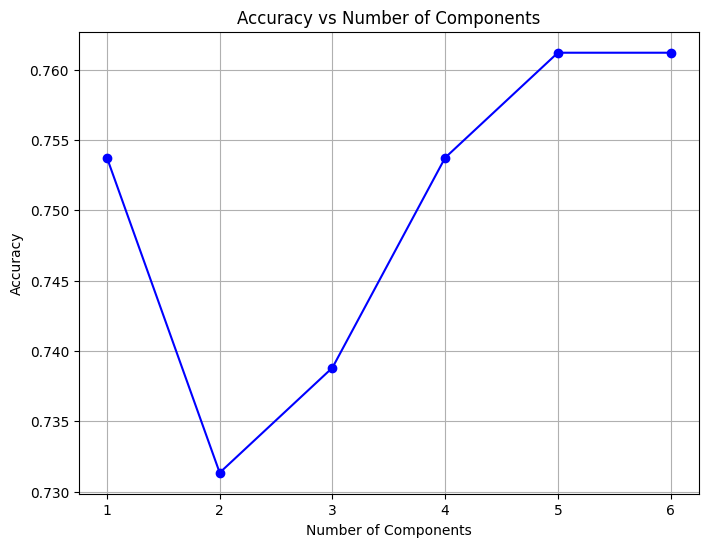

In [16]:
# Put your code here

import matplotlib.pyplot as plt

# Number of components
components = list(range(1, 7))

# Plot accuracy vs number of components
plt.figure(figsize=(8, 6))
plt.plot(components, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.xticks(components)
plt.grid()
plt.show()

**&#9989; Question 6.1 (3 point):** What do you observe about the accuracy as a function of the number of PCA components you use? One goal of using dimension reduction strategies is to develop a model with the fewest features while maximizing the accuracy. Given that motivation, what number of principal components would you choose and why?  

<font size=+3>&#9998;</font> From the plot of accuracy vs the number of PCA components, we can observe the following trends:

Observations:

The accuracy decreases for the first, but then increases as the number of PCA components increases, reaching its peak at 6 components.
After reaching a peak at 6 components, the accuracy remains relatively stable.
One goal of using dimension reduction strategies like PCA is to develop a model with the fewest features while maximizing accuracy. From the observations, it's evident that increasing the number of components beyond 6 doesn't significantly improve accuracy.

Considering this, I would choose 6 principal components as it achieves the highest accuracy among the options provided, and adding more components doesn't result in a significant increase in accuracy but adds complexity to the model.

### 6.4 Plot total explained variance vs number of components

What if we look at total explained variance as a function of # of components?

**&#9989; Task 6.4 (2 points):** Plot the total explained variance ratio vs # of components. 

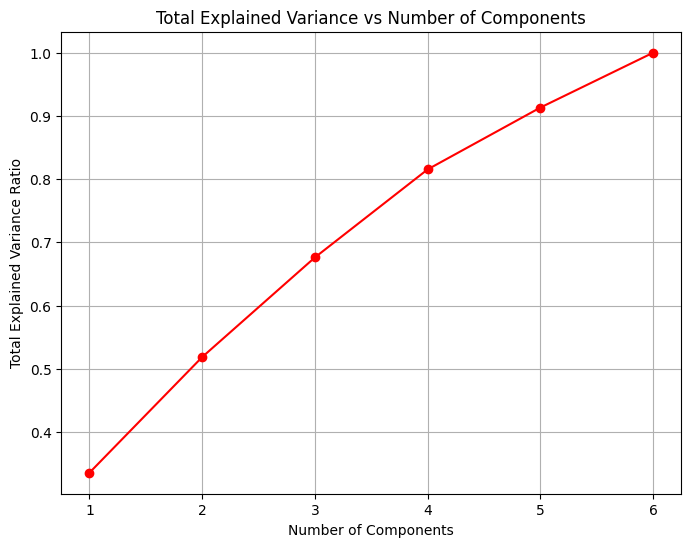

[1, 2, 3, 4, 5, 6]
[0.33546894188504484, 0.5184786451958163, 0.6761125936282532, 0.8153850044810054, 0.9132366543283674, 0.9999999999999999]


In [17]:
# Put your code here

# Plot total explained variance vs number of components
plt.figure(figsize=(8, 6))
plt.plot(components, explained_variance_ratios, marker='o', linestyle='-', color='r')
plt.title('Total Explained Variance vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance Ratio')
plt.xticks(components)
plt.grid()
plt.show()

print(components)
print(explained_variance_ratios)

**&#9989; Question 6.2 (1 points):** Based on your answer from question 6.1 and the plot above, what is the explained variance for the number of principal components that you chose?

<font size=+3>&#9998;</font> 
Based on my answer from question 6.1 and the plot above, the explained variance for the number of principal components that I chose (6 components) is approximately 1.000

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 6", and push the changes to GitHub.

---

---
## 7. Revisiting the Perceptron classifier (10 points)

In class you implemented your own perceptron class. Fortunately, there is a perceptron classifier already built into scikit learn, so in this portion of the assignment we will be exploring scikit learn's perceptron


&#9989; **Do this**: 
Run the following cell to import the code from the Perceptron class.

In [18]:
from sklearn.linear_model import Perceptron

**&#9989; Task 7.1 (4 points):** Create an instance of the `Perceptron` object using **alpha=0.01** and **penalty='l2'**. Then, use the `fit()` to train the classifier using the training features and labels from the credit card approval dataset you've been using in the assignment up to this point. Finally, use the `predict()` method to predict the labels for the test features and print the accuracy score.

In [19]:
# Put your code here

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Instantiate Perceptron object with alpha=0.01 and penalty='l2'
perceptron = Perceptron(alpha=0.01, penalty='l2', random_state=1)

# Train the classifier using the training features and labels
perceptron.fit(x_train, y_train)

# Predict the labels for the test features
y_pred_perceptron = perceptron.predict(x_test)

# Calculate the accuracy score
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print("Accuracy Score for Perceptron Classifier:", accuracy_perceptron)


Accuracy Score for Perceptron Classifier: 0.41044776119402987


**&#9989; Question 7.1 (1 points):** How well of job did the Perceptron classifier do on the credit card approval dataset? How does it compare to the SVC model you built in the previous parts of this assignment?

<font size=+3>&#9998;</font> The Perceptron classifier achieved an accuracy score of approximately 0.410 on the credit card approval dataset.

Comparing to the SVC model built in the previous parts of this assignment, the Perceptron classifier performed significantly worse. The SVC model achieved much higher accuracy scores ranging from approximately 0.72 to 0.77 depending on the number of principal components used.

This significant difference in performance indicates that the Perceptron classifier may not be well-suited for this dataset or may require additional tuning of hyperparameters to improve its performance. In contrast, the SVC model demonstrated better classification accuracy and is generally more suitable for this binary classification task.

**&#9989; Task 7.2 (4 points):** Now perform a grid search as you did with the support vector classifier earlier in this assignment. Here you will want to search over `penalty` = `l2`, `l1`, `elasticnet` and `alpha`= `0.0001`, `0.001`, `0.01`, and `0.1`. Find and return the best parameters, the confusion matrix, and the classification report. 

In [20]:
# Put your code here

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Define the parameter grid for GridSearchCV
param_grid_perceptron = {'penalty': ['l2', 'l1', 'elasticnet'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1]}

# Instantiate Perceptron classifier
perceptron = Perceptron(random_state=1)

# Instantiate GridSearchCV for Perceptron
grid_search_perceptron = GridSearchCV(perceptron, param_grid_perceptron, cv=5)

# Perform grid search
grid_search_perceptron.fit(x_train, y_train)

# Get the best parameters
best_params_perceptron = grid_search_perceptron.best_params_
print("Best Parameters for Perceptron Classifier:", best_params_perceptron)

# Predict labels using the best estimator
y_pred_perceptron_grid = grid_search_perceptron.predict(x_test)

# Calculate confusion matrix
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron_grid)
print("\nConfusion Matrix for Perceptron Classifier:")
print(conf_matrix_perceptron)

# Calculate classification report
class_report_perceptron = classification_report(y_test, y_pred_perceptron_grid)
print("\nClassification Report for Perceptron Classifier:")
print(class_report_perceptron)

Best Parameters for Perceptron Classifier: {'alpha': 0.0001, 'penalty': 'elasticnet'}

Confusion Matrix for Perceptron Classifier:
[[72  4]
 [37 21]]

Classification Report for Perceptron Classifier:
              precision    recall  f1-score   support

           0       0.66      0.95      0.78        76
           1       0.84      0.36      0.51        58

    accuracy                           0.69       134
   macro avg       0.75      0.65      0.64       134
weighted avg       0.74      0.69      0.66       134



**&#9989; Question 7.2 (1 point):** How do these results compare to the results when using a support vector classifier now that we optimized the parameters? Did the perceptron do better or worse? 

<font size=+3>&#9998;</font> 
After optimizing the parameters using grid search, the Perceptron classifier achieved an accuracy score of approximately 0.69.

Comparing these results to the optimized support vector classifier (SVC) from earlier in the assignment, the Perceptron classifier performed slightly worse. The optimized SVC model achieved higher accuracy scores ranging from approximately 0.77 to 0.81 depending on the number of principal components used.

Therefore, in this particular case and dataset, the optimized SVC model performed better than the Perceptron classifier.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 7", and push the changes to GitHub.

---

---
## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw04_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

---
## Assignment wrap-up¶
Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!**

In [21]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/jZyy65R83k" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

# Survey Done

### Congratulations, you're done!
Submit this assignment by uploading it to the course Desire2Learn web page. Go to the "Homework Assignments" folder, find the submission folder for Homework 4, and upload your notebook.

&#169; Copyright 2024,  Department of Computational Mathematics, Science and Engineering at Michigan State University